#**Polynomial Regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv')

df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


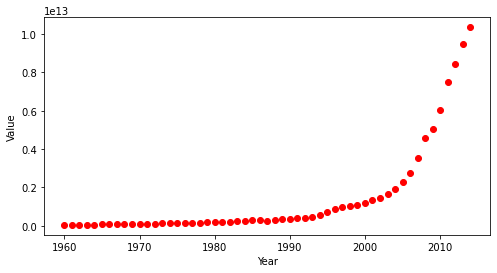

In [3]:
plt.figure(figsize=(8, 4))
x, y = (df['Year'].values, df['Value'].values)
plt.plot(x, y, 'ro')
plt.ylabel('Value')
plt.xlabel('Year')
plt.show()

In [4]:
#Qiymatlarni 0 va 1 oralig'iga tushirib olamiz
x = np.asanyarray(df[['Year']]) / df.Year.max()
y = np.asanyarray(df[['Value']]) / df.Value.max()

#**Linear Regression**

In [5]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [6]:
LR_model.fit(x, y)

LinearRegression()

In [7]:
yhat = LR_model.predict(x)

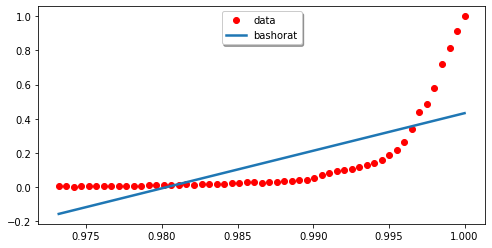

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'ro')
plt.plot(x, yhat, '-', linewidth=2.5)
plt.legend(('data', 'bashorat'), loc='upper center', shadow=True)
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(yhat, y)

print(f"Absolut xatolik {MAE}")

Absolut xatolik 0.12657979406214762


## **Polynomial Regression**

In [10]:
#Yangi model yasab olamiz (LR)
poly_LR = LinearRegression()

In [11]:
from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree=4, include_bias=False)

poly_x = polynom.fit_transform(x, y)

poly_LR = poly_LR.fit(poly_x, y)

In [12]:
#Natija

y_predict_poly = poly_LR.predict(poly_x)

In [13]:
#Baholash
poly_MAE = mean_absolute_error(y_predict_poly, y)

print(f"Absolut xatolik(Polynomial) {poly_MAE}")
print(f"Absolut xatolik(LR) {MAE}")

Absolut xatolik(Polynomial) 0.015865023033341388
Absolut xatolik(LR) 0.12657979406214762


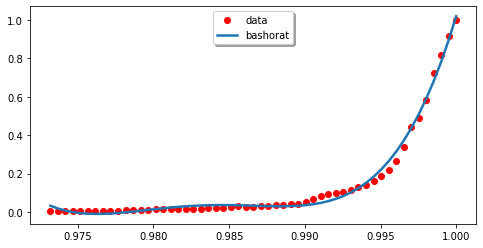

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'ro')
plt.plot(x, y_predict_poly, '-', linewidth=2.5)
plt.legend(('data', 'bashorat'), loc='upper center', shadow=True)
plt.show()